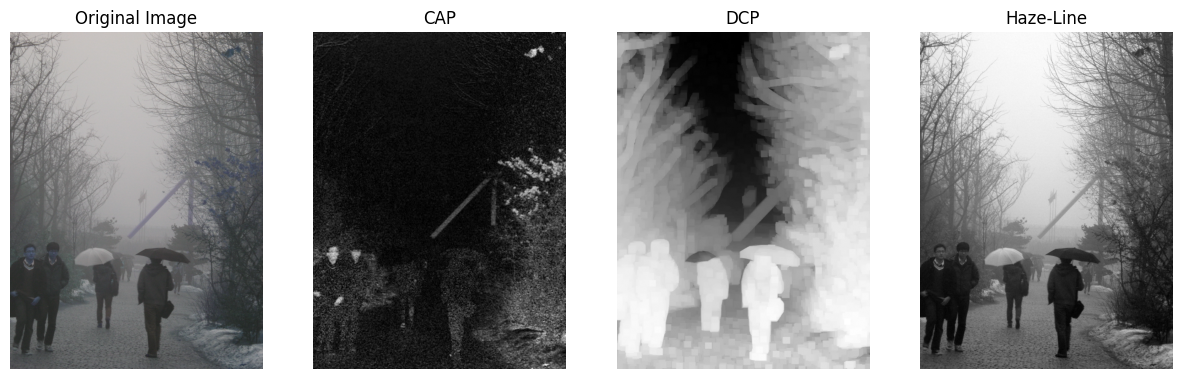

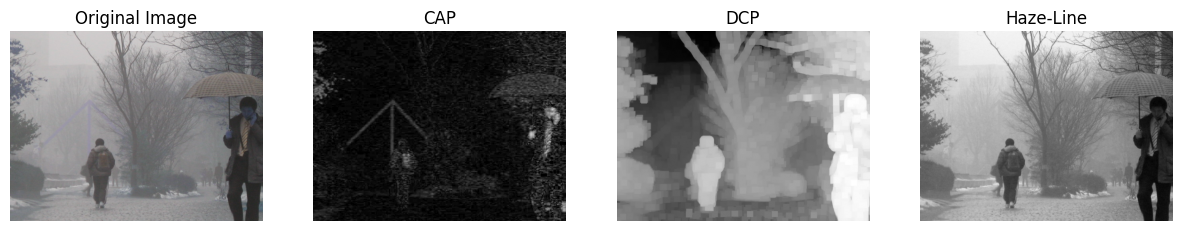

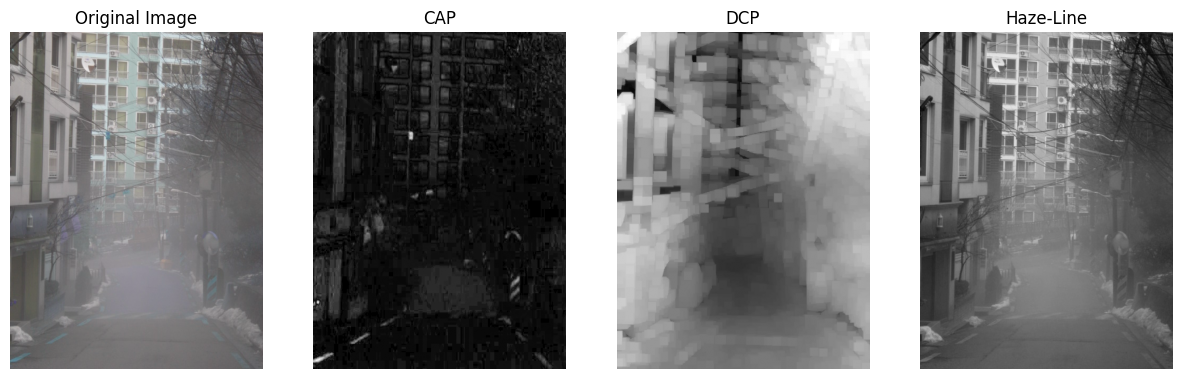

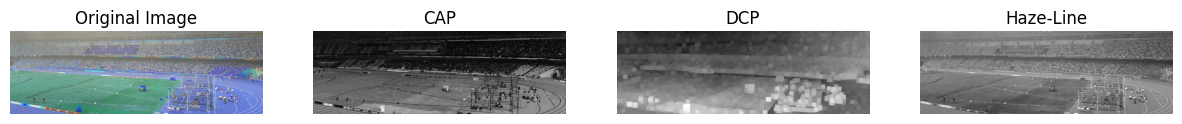

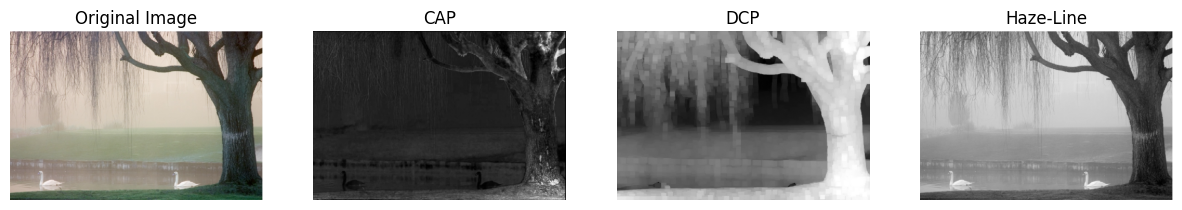

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch

def compute_cap_transmission(image, omega=0.95):
    """Color Attenuation Prior (CAP)"""
    image = image.astype(np.float32) / 255.0
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    brightness = hsv[:, :, 2]
    saturation = hsv[:, :, 1]
    beta = np.max(brightness) + 1e-5
    transmission = 1 - omega * (beta - saturation)
    return np.clip(transmission, 0, 1)

def compute_dcp_transmission(image, omega=0.95, patch_size=15):
    """Dark Channel Prior (DCP)"""
    image = image.astype(np.float32) / 255.0
    min_channel = np.min(image, axis=2)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (patch_size, patch_size))
    dark_channel = cv2.erode(min_channel, kernel)
    transmission = 1 - omega * dark_channel
    return np.clip(transmission, 0, 1)

def compute_haze_line_transmission(image, omega=0.95):
    """Haze-Line Prior"""
    image = image.astype(np.float32) / 255.0
    mean_intensity = np.mean(image, axis=2)
    beta = np.max(mean_intensity) + 1e-5
    transmission = 1 - omega * (beta - mean_intensity)
    return np.clip(transmission, 0, 1)

def compute_all_priors(image):
    """Computes selected priors and returns as a tensor."""
    priors = {
        "Original Image": image / 255.0,
        "CAP": compute_cap_transmission(image),
        "DCP": compute_dcp_transmission(image),
        "Haze-Line": compute_haze_line_transmission(image),
    }
    return priors

def visualize_priors(image):
    """Compute priors and display them side by side."""
    priors = compute_all_priors(image)
    fig, axes = plt.subplots(1, len(priors), figsize=(15, 5))
    
    for ax, (title, prior) in zip(axes, priors.items()):
        ax.imshow(prior, cmap="gray" if title != "Original Image" else None)
        ax.set_title(title, fontsize=12)
        ax.axis("off")
    
    plt.show()



image_path = "dataset/base/train/St_Wf_D_L__033.JPG"
image = cv2.imread(image_path)
visualize_priors(image)
image_path = "dataset/base/train/St_Wf_D_L__029.JPG"
image = cv2.imread(image_path)
visualize_priors(image)
image_path = "dataset/base/train/St_Wf_D_L__009.JPG"
image = cv2.imread(image_path)
visualize_priors(image)
image_path = "dataset/base/test/91.jpg"
image = cv2.imread(image_path)
visualize_priors(image)
image_path = "dataset/base/test/92.jpg"
image = cv2.imread(image_path)
visualize_priors(image)

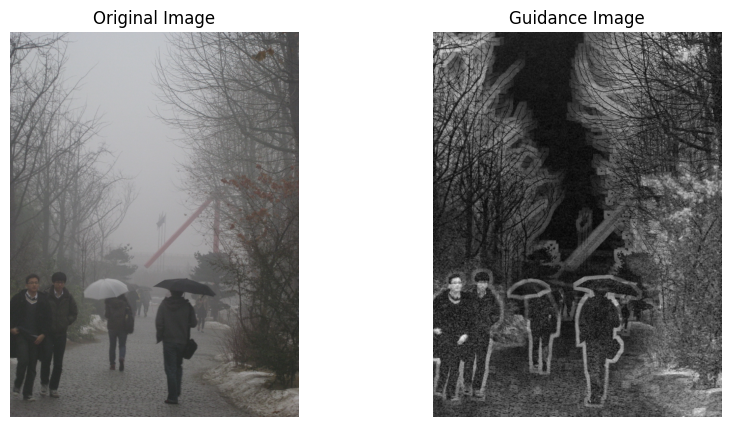

In [ ]:
import cv2
import numpy as np

def compute_cap_transmission(image, omega=0.95):
    """Color Attenuation Prior (CAP)"""
    image = image.astype(np.float32) / 255.0
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    brightness = hsv[:, :, 2]
    saturation = hsv[:, :, 1]
    beta = np.max(brightness) + 1e-5
    transmission = 1 - omega * (beta - saturation)
    return np.clip(transmission, 0, 1)

def compute_dcp_transmission(image, omega=0.95, patch_size=15):
    """Dark Channel Prior (DCP)"""
    image = image.astype(np.float32) / 255.0
    min_channel = np.min(image, axis=2)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (patch_size, patch_size))
    dark_channel = cv2.erode(min_channel, kernel)
    transmission = 1 - omega * dark_channel
    return np.clip(transmission, 0, 1)

def compute_haze_line_transmission(image, omega=0.95):
    """Haze-Line Prior"""
    image = image.astype(np.float32) / 255.0
    mean_intensity = np.mean(image, axis=2)
    beta = np.max(mean_intensity) + 1e-5
    transmission = 1 - omega * (beta - mean_intensity)
    return np.clip(transmission, 0, 1)

def create_guidance_image(image, omega=0.95, patch_size=15):
    # Compute transmission maps using the three methods
    cap_transmission = compute_cap_transmission(image, omega)
    dcp_transmission = compute_dcp_transmission(image, omega, patch_size)
    haze_line_transmission = compute_haze_line_transmission(image, omega)
    
    # Combine the transmission maps by averaging
    guidance_image = (cap_transmission + dcp_transmission + haze_line_transmission) / 3.0
    
    return guidance_image

# Example usage
# image = cv2.imread("dataset/base/train/St_Wf_D_L__033.JPG")
image = cv2.imread("dataset/base/train/St_Wf_D_L__033.JPG")
guidance_image = create_guidance_image(image)

# # Save or display the guidance image
# cv2.imwrite('guidance_image.png', guidance_image * 255)
# cv2.imshow('Guidance Image', guidance_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.figure(figsize=(10, 5))

# Display original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Display guidance image
plt.subplot(1, 2, 2)
plt.imshow(guidance_image, cmap='gray')
plt.title('Guidance Image')
plt.axis('off')

plt.show()

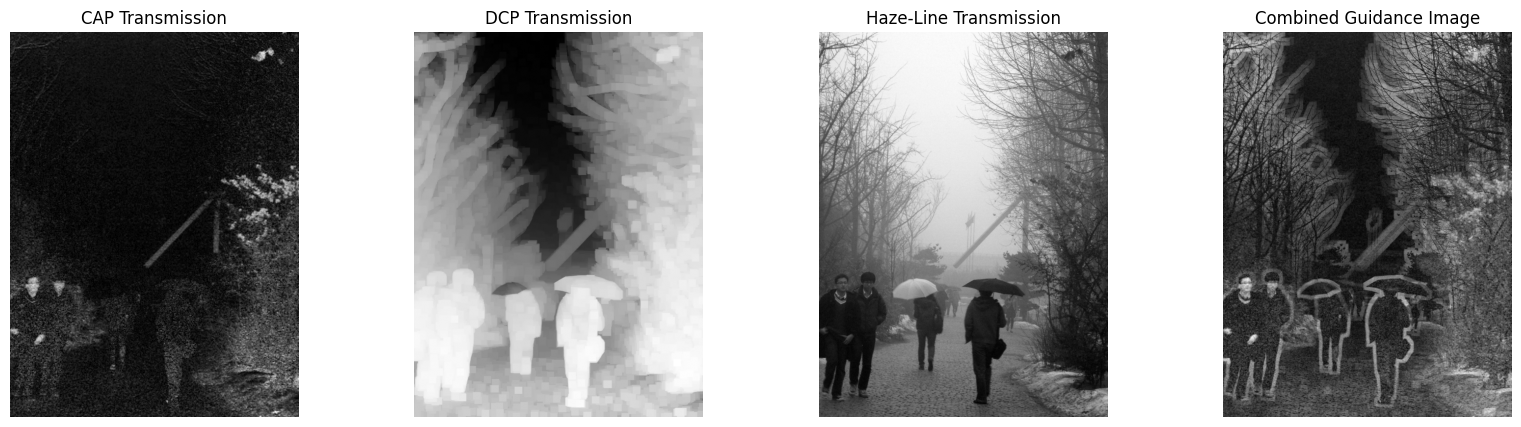

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "dataset/base/train/St_Wf_D_L__033.JPG"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

# Function to compute Color Attenuation Prior (CAP) transmission map
def compute_cap_transmission(image, omega=0.95):
    image = image.astype(np.float32) / 255.0
    hsv = cv2.cvtColor((image * 255).astype(np.uint8), cv2.COLOR_RGB2HSV)
    brightness = hsv[:, :, 2] / 255.0
    saturation = hsv[:, :, 1] / 255.0
    beta = np.max(brightness) + 1e-5
    transmission = 1 - omega * (beta - saturation)
    return np.clip(transmission, 0, 1)

# Function to compute Dark Channel Prior (DCP) transmission map
def compute_dcp_transmission(image, omega=0.95, patch_size=15):
    image = image.astype(np.float32) / 255.0
    min_channel = np.min(image, axis=2)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (patch_size, patch_size))
    dark_channel = cv2.erode(min_channel, kernel)
    transmission = 1 - omega * dark_channel
    return np.clip(transmission, 0, 1)

# Function to compute Haze-Line Prior transmission map
def compute_haze_line_transmission(image, omega=0.95):
    image = image.astype(np.float32) / 255.0
    mean_intensity = np.mean(image, axis=2)
    beta = np.max(mean_intensity) + 1e-5
    transmission = 1 - omega * (beta - mean_intensity)
    return np.clip(transmission, 0, 1)

# Compute transmission maps
cap_transmission = compute_cap_transmission(image)
dcp_transmission = compute_dcp_transmission(image)
haze_line_transmission = compute_haze_line_transmission(image)

# Combine the guidance maps (taking average for balanced contribution)
combined_guidance = (cap_transmission + dcp_transmission + haze_line_transmission) / 3

# Display the results
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes[0].imshow(cap_transmission, cmap='gray')
axes[0].set_title("CAP Transmission")
axes[0].axis("off")

axes[1].imshow(dcp_transmission, cmap='gray')
axes[1].set_title("DCP Transmission")
axes[1].axis("off")

axes[2].imshow(haze_line_transmission, cmap='gray')
axes[2].set_title("Haze-Line Transmission")
axes[2].axis("off")

axes[3].imshow(combined_guidance, cmap='gray')
axes[3].set_title("Combined Guidance Image")
axes[3].axis("off")

plt.show()


In [7]:
import os
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt

def compute_cap_transmission(image, omega=0.95):
    image = image.astype(np.float32) / 255.0
    hsv = cv2.cvtColor((image * 255).astype(np.uint8), cv2.COLOR_RGB2HSV)
    brightness = hsv[:, :, 2] / 255.0
    saturation = hsv[:, :, 1] / 255.0
    beta = np.max(brightness) + 1e-5
    transmission = 1 - omega * (beta - saturation)
    return np.clip(transmission, 0, 1)

def compute_dcp_transmission(image, omega=0.95, patch_size=15):
    image = image.astype(np.float32) / 255.0
    min_channel = np.min(image, axis=2)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (patch_size, patch_size))
    dark_channel = cv2.erode(min_channel, kernel)
    transmission = 1 - omega * dark_channel
    return np.clip(transmission, 0, 1)

def compute_haze_line_transmission(image, omega=0.95):
    image = image.astype(np.float32) / 255.0
    mean_intensity = np.mean(image, axis=2)
    beta = np.max(mean_intensity) + 1e-5
    transmission = 1 - omega * (beta - mean_intensity)
    return np.clip(transmission, 0, 1)

def create_guidance_image(image, omega=0.95, patch_size=15):
    cap_transmission = compute_cap_transmission(image, omega)
    dcp_transmission = compute_dcp_transmission(image, omega, patch_size)
    haze_line_transmission = compute_haze_line_transmission(image, omega)
    guidance_image = (cap_transmission + dcp_transmission + haze_line_transmission) / 3.0
    return guidance_image

def process_and_save_images(input_dir, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    for filename in os.listdir(input_dir):
        if filename.endswith(".JPG") or filename.endswith(".jpg"):
            image_path = os.path.join(input_dir, filename)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            
            guidance_image = create_guidance_image(image)
            
            output_path = os.path.join(output_dir, filename)
            cv2.imwrite(output_path, (guidance_image * 255).astype(np.uint8))
            print(f"Processed and saved: {output_path}")

# Process train and test datasets
process_and_save_images("dataset/base/train", "dataset/guided/train")
process_and_save_images("dataset/base/test", "dataset/guided/test")


Processed and saved: dataset/guided/train/1.jpg
Processed and saved: dataset/guided/train/10.jpg
Processed and saved: dataset/guided/train/100.jpg
Processed and saved: dataset/guided/train/10003688883_be11839091_z.jpg
Processed and saved: dataset/guided/train/10020320283_83b1514ef4_z.jpg
Processed and saved: dataset/guided/train/100309892_94978cd79e_z.jpg
Processed and saved: dataset/guided/train/100412171_55555c1ce0_z.jpg
Processed and saved: dataset/guided/train/101.jpg
Processed and saved: dataset/guided/train/101039_5ab416185b_z.jpg
Processed and saved: dataset/guided/train/102.jpg
Processed and saved: dataset/guided/train/10278173383_990d01a5eb_z.jpg
Processed and saved: dataset/guided/train/10367996104_44d1937338_z.jpg
Processed and saved: dataset/guided/train/1055104210_c386d6111c_z.jpg
Processed and saved: dataset/guided/train/10560349313_689e068235_z.jpg
Processed and saved: dataset/guided/train/10677419946_15c3d79e45_z.jpg
Processed and saved: dataset/guided/train/10750317316

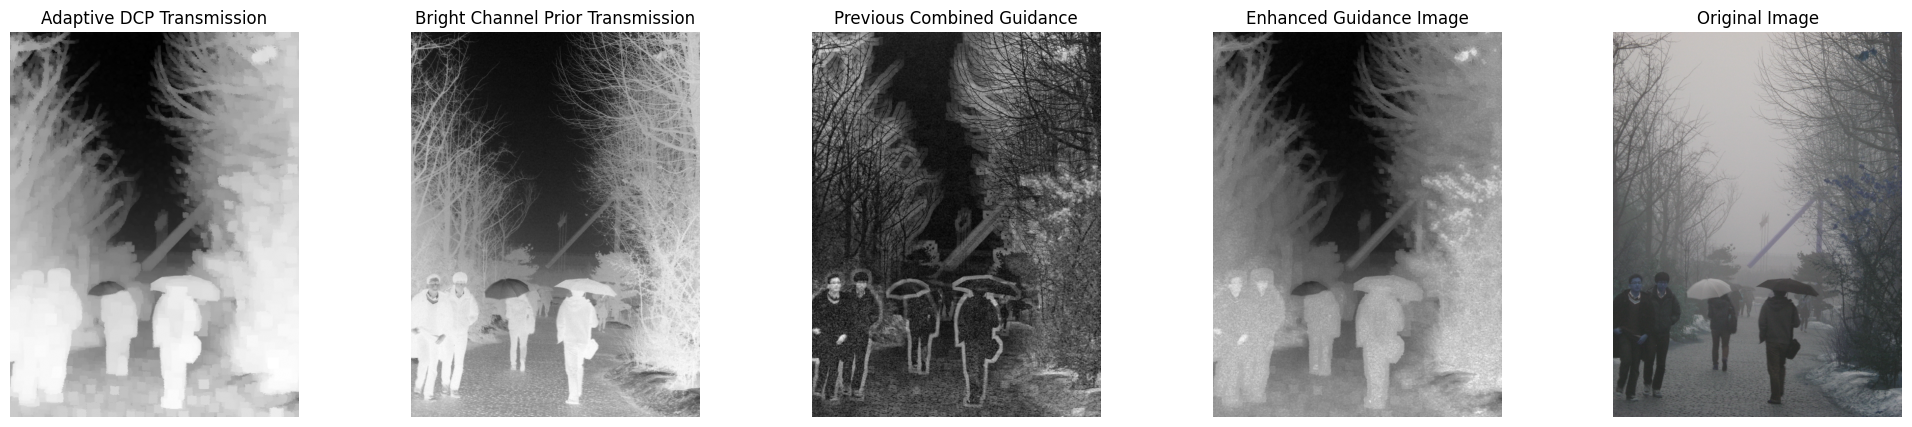

In [ ]:
def compute_adaptive_dcp_transmission(image, omega=0.95, base_patch_size=15):
    """Adaptive Dark Channel Prior (ADCP)"""
    image = image.astype(np.float32) / 255.0
    min_channel = np.min(image, axis=2)

    # Adaptive patch size: increase where haze is dense (low intensity regions)
    haze_density = 1 - min_channel  # Estimate haze density
    adaptive_patch_size = np.clip((haze_density * base_patch_size * 2).astype(int), 3, 35)

    transmission = np.ones_like(min_channel)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            patch_size = adaptive_patch_size[i, j]
            half_size = patch_size // 2
            i_min, i_max = max(0, i - half_size), min(image.shape[0], i + half_size)
            j_min, j_max = max(0, j - half_size), min(image.shape[1], j + half_size)
            dark_channel = np.min(min_channel[i_min:i_max, j_min:j_max])
            transmission[i, j] = 1 - omega * dark_channel

    return np.clip(transmission, 0, 1)

def compute_bright_channel_prior(image, omega=0.95):
    """Bright Channel Prior (BCP) - Useful for bright, dense haze areas."""
    image = image.astype(np.float32) / 255.0
    max_channel = np.max(image, axis=2)
    transmission = 1 - omega * max_channel  # Reverse of dark channel
    return np.clip(transmission, 0, 1)

# Compute improved transmission maps
adaptive_dcp_transmission_list = []
bright_channel_transmission_list = []

image_paths = ["dataset/base/train/St_Wf_D_L__033.JPG"]
# "dataset/base/train/St_Wf_D_L__029.JPG", "dataset/base/train/St_Wf_D_L__009.JPG", "dataset/base/test/91.jpg", "dataset/base/test/92.jpg"

for img_path in image_paths:
    img = cv2.imread(img_path)
    adaptive_dcp_transmission_list.append(compute_adaptive_dcp_transmission(img))
    bright_channel_transmission_list.append(compute_bright_channel_prior(img))

# Example usage for the first image
for i in range(len(image_paths)):
    adaptive_dcp_transmission = adaptive_dcp_transmission_list[i]
    bright_channel_transmission = bright_channel_transmission_list[i]

    # Multi-scale fusion: Combining different priors
    enhanced_guidance = (cap_transmission + adaptive_dcp_transmission + haze_line_transmission + bright_channel_transmission) / 4

    # Display the results
    fig, axes = plt.subplots(1, 5, figsize=(25, 5))
    axes[0].imshow(adaptive_dcp_transmission, cmap='gray')
    axes[0].set_title("Adaptive DCP Transmission")
    axes[0].axis("off")

    axes[1].imshow(bright_channel_transmission, cmap='gray')
    axes[1].set_title("Bright Channel Prior Transmission")
    axes[1].axis("off")

    axes[2].imshow(combined_guidance, cmap='gray')
    axes[2].set_title("Previous Combined Guidance")
    axes[2].axis("off")

    axes[3].imshow(enhanced_guidance, cmap='gray')
    axes[3].set_title("Enhanced Guidance Image")
    axes[3].axis("off")

    axes[4].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[4].set_title("Original Image")
    axes[4].axis("off")

    plt.show()
